#### Import libraries

In [1]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup as bs 
from PIL import Image
import io

In [2]:
print(f'pandas version = {pd.__version__}')
print(f'beautifulsoup version = {bs4.__version__}')

pandas version = 1.5.0
beautifulsoup version = 4.11.2


In [3]:
pd.Timestamp.today()

Timestamp('2023-03-27 09:42:02.458633')

In [4]:
url = 'https://www.liverpoolfc.com/team/first-team'
r = requests.get(url)
r.text[:100]

'<!DOCTYPE html>\n<!--[if lt IE 7 ]> <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://openg'

In [5]:
s = bs(r.text,'lxml')
type(s)

bs4.BeautifulSoup

In [6]:
print(s.prettify())

<!DOCTYPE html>
<!--[if lt IE 7 ]> <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie6 oldie"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie7 oldie"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie8 oldie"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" prefix="og: http://ogp.me/ns#" id="top" class="no-js ie9"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" id="top">
 <!--<![endif]-->
 <head>
  <script>
   (function(H){H.className=H.className.replace(/\bno-js\b/,'js')})(document.documentElement);

    if (window.history.replaceState && windo

In [7]:
members = s.select('li.team-player-list-item')

In [8]:
members

[<li class="team-player-list-item">
 <a href="/team/first-team/player/alisson-becker">
 <div class="img-wrap">
 <img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg"/>
 </div>
 <div class="number">1</div>
 <div class="about">
 <div class="name">
 <span>Alisson</span> <span>Becker</span>
 </div>
 </div>
 </a>
 </li>,
 <li class="team-player-list-item">
 <a href="/team/first-team/player/adrian">
 <div class="img-wrap">
 <img alt="Adrian" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg"/>
 </div>
 <div class="number">13</div>
 <div class="about">
 <div class="name">
 <span>Adrian</span>
 </div>
 </div>
 </a>
 </li>,
 <li class="team-player-list-item">
 <a href="/team/first-team/player/caoimhin-kelleher">
 <div class="img-wrap">
 <img alt="Caoimhin Kelleher" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_gen

In [9]:
len(members)

32

In [10]:
print(members[0].prettify())

<li class="team-player-list-item">
 <a href="/team/first-team/player/alisson-becker">
  <div class="img-wrap">
   <img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg"/>
  </div>
  <div class="number">
   1
  </div>
  <div class="about">
   <div class="name">
    <span>
     Alisson
    </span>
    <span>
     Becker
    </span>
   </div>
  </div>
 </a>
</li>



#### <font color = yellow>display first member's info

In [11]:
# display first member's info
members[0].select_one('a')['href']

'/team/first-team/player/alisson-becker'

In [63]:
for i in range(32):
  members[i].select_one('a')['href']
  print(members[i])

<li class="team-player-list-item">
<a href="/team/first-team/player/alisson-becker">
<div class="img-wrap">
<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg"/>
</div>
<div class="number">1</div>
<div class="about">
<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>
</div>
</a>
</li>
<li class="team-player-list-item">
<a href="/team/first-team/player/adrian">
<div class="img-wrap">
<img alt="Adrian" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg"/>
</div>
<div class="number">13</div>
<div class="about">
<div class="name">
<span>Adrian</span>
</div>
</div>
</a>
</li>
<li class="team-player-list-item">
<a href="/team/first-team/player/caoimhin-kelleher">
<div class="img-wrap">
<img alt="Caoimhin Kelleher" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_general_500.jpeg"/>
</div>
<div cla

#### <font color = yellow>Display number of member

In [64]:
members[0].select_one('div.number')

<div class="number">1</div>

In [65]:
for i in range(32):
  print(members[i].select_one('div.number'))

<div class="number">1</div>
<div class="number">13</div>
<div class="number">62</div>
<div class="number">2</div>
<div class="number">4</div>
<div class="number">5</div>
<div class="number">21</div>
<div class="number">22</div>
<div class="number">26</div>
<div class="number">32</div>
<div class="number">46</div>
<div class="number">47</div>
<div class="number">66</div>
<div class="number">3</div>
<div class="number">6</div>
<div class="number">7</div>
<div class="number">8</div>
<div class="number">14</div>
<div class="number">15</div>
<div class="number">17</div>
<div class="number">19</div>
<div class="number">29</div>
<div class="number">43</div>
<div class="number">9</div>
<div class="number">11</div>
<div class="number">18</div>
<div class="number">20</div>
<div class="number">23</div>
<div class="number">27</div>
<div class="number">28</div>
<div class="number">72</div>
<div class="number">97</div>


#### <font color = yellow> Display number format in text 

In [66]:
for i in range(32):
  print(members[i].select_one('div.number').text)


1
13
62
2
4
5
21
22
26
32
46
47
66
3
6
7
8
14
15
17
19
29
43
9
11
18
20
23
27
28
72
97


In [67]:
members[0].select_one('div.number').text

'1'

#### <font color = yellow>Display name of member

In [68]:
for i in range(32):
  print(members[i].select_one('div.name'))

<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>
<div class="name">
<span>Adrian</span>
</div>
<div class="name">
<span>Caoimhin</span> <span>Kelleher</span>
</div>
<div class="name">
<span>Joe</span> <span>Gomez</span>
</div>
<div class="name">
<span>Virgil</span> <span>van</span> <span>Dijk</span>
</div>
<div class="name">
<span>Ibrahima</span> <span>Konate</span>
</div>
<div class="name">
<span>Kostas</span> <span>Tsimikas</span>
</div>
<div class="name">
<span>Calvin</span> <span>Ramsay</span>
</div>
<div class="name">
<span>Andy</span> <span>Robertson</span>
</div>
<div class="name">
<span>Joel</span> <span>Matip</span>
</div>
<div class="name">
<span>Rhys</span> <span>Williams</span>
</div>
<div class="name">
<span>Nathaniel</span> <span>Phillips</span>
</div>
<div class="name">
<span>Trent</span> <span>Alexander-Arnold</span>
</div>
<div class="name">
<span>Fabinho</span>
</div>
<div class="name">
<span>Thiago</span> <span>Alcantara</span>
</div>
<div class="na

In [69]:
members[0].select_one('div.name')

<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>

#### <font color = yellow> Display full name of each member in text format

In [70]:
for i in range(32):
  print(members[i].select_one('div.name').get_text(' ',strip=True))

Alisson Becker
Adrian
Caoimhin Kelleher
Joe Gomez
Virgil van Dijk
Ibrahima Konate
Kostas Tsimikas
Calvin Ramsay
Andy Robertson
Joel Matip
Rhys Williams
Nathaniel Phillips
Trent Alexander-Arnold
Fabinho
Thiago Alcantara
James Milner
Naby Keita
Jordan Henderson
Alex Oxlade-Chamberlain
Curtis Jones
Harvey Elliott
Arthur Melo
Stefan Bajcetic
Roberto Firmino
Mohamed Salah
Cody Gakpo
Diogo Jota
Luis Diaz
Darwin Nunez
Fabio Carvalho
Sepp van den Berg
Marcelo Pitaluga


#### <font color = yellow>Display first name of each member

In [81]:
for i in range(32):
  print(members[i].select_one('div.name').select('span')[0].text)

Alisson
Adrian
Caoimhin
Joe
Virgil
Ibrahima
Kostas
Calvin
Andy
Joel
Rhys
Nathaniel
Trent
Fabinho
Thiago
James
Naby
Jordan
Alex
Curtis
Harvey
Arthur
Stefan
Roberto
Mohamed
Cody
Diogo
Luis
Darwin
Fabio
Sepp
Marcelo


In [82]:
members[0].select_one('div.name').select('span')[0].text

'Alisson'

#### <font color = yellow>Display last name of each member

In [ ]:
for i in range(3):
  print(members[i].select_one('div.name').select('span')[1].get_text(None,"None"))

In [109]:
members[0].select_one('div.name').select('span')[1].text

'Becker'

In [110]:
members[0].select_one('div.name>span')

<span>Alisson</span>

In [111]:
members[0].select('div.name>span')

[<span>Alisson</span>, <span>Becker</span>]

In [112]:
members[0].select('div.name>span')[0].text

'Alisson'

In [113]:
members[0].select('div.name>span')[1].text

'Becker'

In [114]:
members[0]

<li class="team-player-list-item">
<a href="/team/first-team/player/alisson-becker">
<div class="img-wrap">
<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg"/>
</div>
<div class="number">1</div>
<div class="about">
<div class="name">
<span>Alisson</span> <span>Becker</span>
</div>
</div>
</a>
</li>

In [115]:
image = members[0].select_one('img')
image

<img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg"/>

In [116]:
type(image)

bs4.element.Tag

In [118]:
image['alt']

'Alisson Becker'

In [119]:
members[0].select_one('img')['src']

'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg'

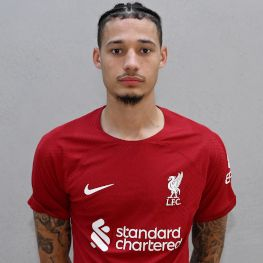

In [120]:
r1 = requests.get(members[10].select_one('img')['src'])
img = Image.open(io.BytesIO(r1.content))
img

In [27]:
def save_image(imgfilename:str,contents):
  with open(imgfilename, 'wb') as f:
    f.write(contents)

In [28]:
members[:33]

[<li class="team-player-list-item">
 <a href="/team/first-team/player/alisson-becker">
 <div class="img-wrap">
 <img alt="Alisson Becker" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg"/>
 </div>
 <div class="number">1</div>
 <div class="about">
 <div class="name">
 <span>Alisson</span> <span>Becker</span>
 </div>
 </div>
 </a>
 </li>,
 <li class="team-player-list-item">
 <a href="/team/first-team/player/adrian">
 <div class="img-wrap">
 <img alt="Adrian" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg"/>
 </div>
 <div class="number">13</div>
 <div class="about">
 <div class="name">
 <span>Adrian</span>
 </div>
 </div>
 </a>
 </li>,
 <li class="team-player-list-item">
 <a href="/team/first-team/player/caoimhin-kelleher">
 <div class="img-wrap">
 <img alt="Caoimhin Kelleher" src="https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_gen

In [29]:
lst = []
for e in members[:33]:
  mem_img_url = e.select_one('img')['src']
  mem_name = e.select_one('img')['alt']
  mem_number = e.select_one('div.number').text
  mem_link = f"https://www.liverpoolfc.com{e.select_one('a')['href']}"
  print(f'{mem_name} {mem_number} {mem_img_url} {mem_link}')
  lst.append([mem_name,mem_number,mem_img_url,mem_link])

Alisson Becker 1 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/alisson-becker
Adrian 13 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/adrian
Caoimhin Kelleher 62 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher
Joe Gomez 2 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132854_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/joe-gomez
Virgil van Dijk 4 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132600_misc_general_500.jpeg https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk
Ibrahima Konate 5 https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/

In [30]:
lst[:33] 

[['Alisson Becker',
  '1',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/alisson-becker'],
 ['Adrian',
  '13',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/adrian'],
 ['Caoimhin Kelleher',
  '62',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher'],
 ['Joe Gomez',
  '2',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132854_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/joe-gomez'],
 ['Virgil van Dijk',
  '4',
  'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132600_misc_general_500.jpeg',
  'https://www.liverpoolfc.com/team/first-team/player/

In [31]:
pd.options.display.max_colwidth = 0
df = pd.DataFrame(lst,columns=['name','number','img_url','link'])
df.head()

,name,number,img_url,link
0,Alisson Becker,1,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker
1,Adrian,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/adrian
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher
3,Joe Gomez,2,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132854_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/joe-gomez
4,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132600_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk


In [32]:
from IPython.display import HTML
def to_html_img(url,alt=None,width=100):
  if alt==None:
    alt=''
  return f'<img alt="{alt}" src = "{url}" width="{width}"/>'

In [33]:
to_html_img('https://www.liverpoolfc.com/team/first-team/player/alisson-becker')

'<img alt="" src = "https://www.liverpoolfc.com/team/first-team/player/alisson-becker" width="100"/>'

In [34]:
df['img'] = df.apply(lambda r: to_html_img(r['img_url'],r['name'],100),axis=1)
df.head()

,name,number,img_url,link,img
0,Alisson Becker,1,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker,"<img alt=""Alisson Becker"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg"" width=""100""/>"
1,Adrian,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/adrian,"<img alt=""Adrian"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg"" width=""100""/>"
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher,"<img alt=""Caoimhin Kelleher"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_general_500.jpeg"" width=""100""/>"
3,Joe Gomez,2,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132854_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/joe-gomez,"<img alt=""Joe Gomez"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132854_misc_general_500.jpeg"" width=""100""/>"
4,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132600_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk,"<img alt=""Virgil van Dijk"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132600_misc_general_500.jpeg"" width=""100""/>"


In [35]:
HTML(df[:33][['name','number','img']].to_html(escape=False))

,name,number,img
0,Alisson Becker,1,
1,Adrian,13,
2,Caoimhin Kelleher,62,
3,Joe Gomez,2,
4,Virgil van Dijk,4,
5,Ibrahima Konate,5,
6,Kostas Tsimikas,21,
7,Calvin Ramsay,22,
8,Andy Robertson,26,
9,Joel Matip,32,


In [36]:
def to_html_a(url,text):
  if text==None:
    text=''
  return f'<a href={url}>{text}</a>'

In [37]:
to_html_a('https://www.liverpoolfc.com/team/first-team/player/alisson-becker','text')

'<a href=https://www.liverpoolfc.com/team/first-team/player/alisson-becker>text</a>'

In [38]:
df.head()

,name,number,img_url,link,img
0,Alisson Becker,1,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker,"<img alt=""Alisson Becker"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg"" width=""100""/>"
1,Adrian,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/adrian,"<img alt=""Adrian"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg"" width=""100""/>"
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher,"<img alt=""Caoimhin Kelleher"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_general_500.jpeg"" width=""100""/>"
3,Joe Gomez,2,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132854_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/joe-gomez,"<img alt=""Joe Gomez"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132854_misc_general_500.jpeg"" width=""100""/>"
4,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132600_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk,"<img alt=""Virgil van Dijk"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132600_misc_general_500.jpeg"" width=""100""/>"


In [39]:
df['a'] = df.apply(lambda r: to_html_a(r['link'],r['name']),axis=1)
df

,name,number,img_url,link,img,a
0,Alisson Becker,1,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/alisson-becker,"<img alt=""Alisson Becker"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132584_misc_general_500.jpeg"" width=""100""/>",<a href=https://www.liverpoolfc.com/team/first-team/player/alisson-becker>Alisson Becker</a>
1,Adrian,13,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/adrian,"<img alt=""Adrian"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132595_misc_general_500.jpeg"" width=""100""/>",<a href=https://www.liverpoolfc.com/team/first-team/player/adrian>Adrian</a>
2,Caoimhin Kelleher,62,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher,"<img alt=""Caoimhin Kelleher"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132725_misc_general_500.jpeg"" width=""100""/>",<a href=https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher>Caoimhin Kelleher</a>
3,Joe Gomez,2,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132854_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/joe-gomez,"<img alt=""Joe Gomez"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132854_misc_general_500.jpeg"" width=""100""/>",<a href=https://www.liverpoolfc.com/team/first-team/player/joe-gomez>Joe Gomez</a>
4,Virgil van Dijk,4,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132600_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk,"<img alt=""Virgil van Dijk"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132600_misc_general_500.jpeg"" width=""100""/>",<a href=https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk>Virgil van Dijk</a>
5,Ibrahima Konate,5,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132853_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/ibrahima-konate,"<img alt=""Ibrahima Konate"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132853_misc_general_500.jpeg"" width=""100""/>",<a href=https://www.liverpoolfc.com/team/first-team/player/ibrahima-konate>Ibrahima Konate</a>
6,Kostas Tsimikas,21,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132594_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/kostas-tsimikas,"<img alt=""Kostas Tsimikas"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132594_misc_general_500.jpeg"" width=""100""/>",<a href=https://www.liverpoolfc.com/team/first-team/player/kostas-tsimikas>Kostas Tsimikas</a>
7,Calvin Ramsay,22,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132857_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/calvin-ramsay,"<img alt=""Calvin Ramsay"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132857_misc_general_500.jpeg"" width=""100""/>",<a href=https://www.liverpoolfc.com/team/first-team/player/calvin-ramsay>Calvin Ramsay</a>
8,Andy Robertson,26,https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132585_misc_general_500.jpeg,https://www.liverpoolfc.com/team/first-team/player/andy-robertson,"<img alt=""Andy Robertson"" src = ""https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/misc/0002/33/thumb_132585_misc_general_500.jpeg"" width=""100""/>",<a href=https://www.liverpoolfc.com/team/first-team/player/andy-robertson>Andy Robertson</a>
9,Joel Matip,32,https://d3j2s6hdd6a7rg.clou

In [40]:
HTML(df[:33][['name','number','img','a']].to_html(escape=False))

,name,number,img,a
0,Alisson Becker,1,,Alisson Becker
1,Adrian,13,,Adrian
2,Caoimhin Kelleher,62,,Caoimhin Kelleher
3,Joe Gomez,2,,Joe Gomez
4,Virgil van Dijk,4,,Virgil van Dijk
5,Ibrahima Konate,5,,Ibrahima Konate
6,Kostas Tsimikas,21,,Kostas Tsimikas
7,Calvin Ramsay,22,,Calvin Ramsay
8,Andy Robertson,26,,Andy Robertson
9,Joel Matip,32,,Joel Matip


In [41]:
pd.options.display.max_colwidth = 0
data = pd.DataFrame(df, columns=['name','number','a'])
data

,name,number,a
0,Alisson Becker,1,<a href=https://www.liverpoolfc.com/team/first-team/player/alisson-becker>Alisson Becker</a>
1,Adrian,13,<a href=https://www.liverpoolfc.com/team/first-team/player/adrian>Adrian</a>
2,Caoimhin Kelleher,62,<a href=https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher>Caoimhin Kelleher</a>
3,Joe Gomez,2,<a href=https://www.liverpoolfc.com/team/first-team/player/joe-gomez>Joe Gomez</a>
4,Virgil van Dijk,4,<a href=https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk>Virgil van Dijk</a>
5,Ibrahima Konate,5,<a href=https://www.liverpoolfc.com/team/first-team/player/ibrahima-konate>Ibrahima Konate</a>
6,Kostas Tsimikas,21,<a href=https://www.liverpoolfc.com/team/first-team/player/kostas-tsimikas>Kostas Tsimikas</a>
7,Calvin Ramsay,22,<a href=https://www.liverpoolfc.com/team/first-team/player/calvin-ramsay>Calvin Ramsay</a>
8,Andy Robertson,26,<a href=https://www.liverpoolfc.com/team/first-team/player/andy-robertson>Andy Robertson</a>
9,Joel Matip,32,<a href=https://www.liverpoolfc.com/team/first-team/player/joel-matip>Joel Matip</a>


In [42]:
data.to_csv('footballer.csv')

In [43]:
df = pd.read_csv('footballer.csv')
df

,Unnamed: 0,name,number,a
0,0,Alisson Becker,1,<a href=https://www.liverpoolfc.com/team/first-team/player/alisson-becker>Alisson Becker</a>
1,1,Adrian,13,<a href=https://www.liverpoolfc.com/team/first-team/player/adrian>Adrian</a>
2,2,Caoimhin Kelleher,62,<a href=https://www.liverpoolfc.com/team/first-team/player/caoimhin-kelleher>Caoimhin Kelleher</a>
3,3,Joe Gomez,2,<a href=https://www.liverpoolfc.com/team/first-team/player/joe-gomez>Joe Gomez</a>
4,4,Virgil van Dijk,4,<a href=https://www.liverpoolfc.com/team/first-team/player/virgil-van-dijk>Virgil van Dijk</a>
5,5,Ibrahima Konate,5,<a href=https://www.liverpoolfc.com/team/first-team/player/ibrahima-konate>Ibrahima Konate</a>
6,6,Kostas Tsimikas,21,<a href=https://www.liverpoolfc.com/team/first-team/player/kostas-tsimikas>Kostas Tsimikas</a>
7,7,Calvin Ramsay,22,<a href=https://www.liverpoolfc.com/team/first-team/player/calvin-ramsay>Calvin Ramsay</a>
8,8,Andy Robertson,26,<a href=https://www.liverpoolfc.com/team/first-team/player/andy-robertson>Andy Robertson</a>
9,9,Joel Matip,32,<a href=https://www.liverpoolfc.com/team/first-team/player/joel-matip>Joel Matip</a>


<font size = 6><p style =  'text-align:center'><font color = yellow><b>The End</b></font>